# The Oscars (Assignment # 07) EECS -731
---

**Quick Note:** Some content of this assignment (pre-processing and merging part) and my assignment # 03 (Weekend Movie Trip, http://github.com/usajid/731_assign3) notebook will be similar, as I have used the same datasets for both assignments.

For this assignment, I took three datasets from the MovieLens Website (https://grouplens.org/datasets/movielens/), namely **Movies, Ratings, and Tags datasets**. First, we clean and merge (those datasets into one) as a pre-process, followed by few compelling visualizations that can prove really helpful in getting valuable insights into the data.

In [1]:
%%time

# Importing the required modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Render out plots inline
%matplotlib inline

CPU times: user 1.04 s, sys: 345 ms, total: 1.39 s
Wall time: 5.07 s


### Movies Dataset Analysis

In [2]:
movies_ds = pd.read_csv ("../data/movies.csv", dtype = {"movieId": np.int32}, encoding = 'UTF-8')
movies_ds.head ()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
print ("Movies Dataset Basic Insights:")
print ("Unique Movies : ", len(movies_ds['movieId'].unique()))
updated_movies_df = movies_ds.drop ('genres', axis = 1)

Movies Dataset Basic Insights:
Unique Movies :  9742


As shown above, the movies csv file contains total **9724** unique movies. Consequenly, from the table, it is evident that it provides movies names and their **genre**. We can use the **genre** and **title** features for data modeling purpose (e.g. Clustering similar movies together).

### Ratings Dataset Analysis

In [4]:
from datetime import datetime

def dateparse (time_in_secs):    
    return datetime.fromtimestamp (float (time_in_secs))

rating_df = pd.read_csv ("../data/ratings.csv", parse_dates = ["timestamp"], date_parser = dateparse, dtype = {"userId": np.int32, "movieId": np.int32, "rating": np.float32}, encoding = 'UTF-8')
rating_df.head ()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 13:45:03
1,1,3,4.0,2000-07-30 13:20:47
2,1,6,4.0,2000-07-30 13:37:04
3,1,47,5.0,2000-07-30 14:03:35
4,1,50,5.0,2000-07-30 13:48:51


In [5]:
print ("Ratings Dataset Basic Insights:")
print ("Unique Users : ", len(rating_df ['userId'].unique ()))
print ("Unique Movies : ", len(rating_df['movieId'].unique()))
updated_ratings_df = rating_df.drop('timestamp', axis = 1)

Ratings Dataset Basic Insights:
Unique Users :  610
Unique Movies :  9724


As seen above, **610** users participated in movie ratings for **9724** unique movies. This dataset also has timestamp that may be useful in time based analysis or modeling. But for this assignment, for merging process later, I dropped this feature being not useful (as part of **feautre engineering/cleaning process**).

### Tags Dataset Analysis

In [6]:
tag_df = pd.read_csv ("../data/tags.csv", parse_dates = ["timestamp"], date_parser = dateparse, dtype = {"userId": np.int32, "movieId": np.int32}, encoding = 'UTF-8')
tag_df.head ()

,userId,movieId,tag,timestamp
0,2,60756,funny,2015-10-24 14:29:54
1,2,60756,Highly quotable,2015-10-24 14:29:56
2,2,60756,will ferrell,2015-10-24 14:29:52
3,2,89774,Boxing story,2015-10-24 14:33:27
4,2,89774,MMA,2015-10-24 14:33:20


In [7]:
tag_df ['tag'] = tag_df ['tag'].str.lower ().str.replace (' ', '').str.replace ('-', '')
tag_df.head ()
tag_df.shape

(3683, 4)

In [8]:
print ("Tags Dataset Basic Insights:")
print ("Unique Users : ", len (tag_df ['userId'].unique ()))
print ("Unique Movies : ", len (tag_df ['movieId'].unique ()))
print ("Unique Tags : ", len (tag_df ['tag'].unique ()))
updated_tag_df = tag_df.drop ('timestamp', axis = 1)

Tags Dataset Basic Insights:
Unique Users :  58
Unique Movies :  1572
Unique Tags :  1460


The tag dataset csv file contains tags that are given by the users to different movies. As shown above, **1572 (out of total 9724)** movies have been given total **1460** tags or keywords by **58 (out of total 610)** unique and different users. The tag feature assigned to different movies can be used again for different data modeling tasks (e.g. Clustering based modeling).

### Datsets Cleaning and Merging Process

Next, we are merging different datapoints into single dataset that can be used for further process (e.g. visualization, Data Modeling for classification, clustering or regression purpose).

First, we **merge** *movies* and *ratings* data frames based on common *movieId* feature, followed by merging the resultant table with tags table based on *movieId* and *userId* featues.

In [17]:
# Merging into a single dataset
#updated_ratings_df = updated_ratings_df.drop ('timestamp', axis = 1)
database = updated_movies_df.merge (updated_ratings_df, on = 'movieId', how = 'left')
database = database.merge (updated_tag_df, on = ['movieId', 'userId'], how = 'left')
database.head ()

,movieId,title,userId,rating,tag
0,1,Toy Story (1995),1.0,4.0,NaN
1,1,Toy Story (1995),5.0,4.0,NaN
2,1,Toy Story (1995),7.0,4.5,NaN
3,1,Toy Story (1995),15.0,2.5,NaN
4,1,Toy Story (1995),17.0,4.5,NaN


As we can see that there are some NaN values in the resultant table. So, we **drop** rows with any NaN value. 

In [18]:
#dropping NaN based values
cleaned_df = database.dropna()

print ("Shapes Basic Insight:")
print ("Merged Data Frame : ", database.shape)
print ("Cleaned Data Frame : ", cleaned_df.shape)

cleaned_df.tail ()

Shapes Basic Insight:
Merged Data Frame :  (102695, 5)
Cleaned Data Frame :  (3476, 5)


,movieId,title,userId,rating,tag
102653,187595,Solo: A Star Wars Story (2018),62.0,4.0,starwars
102682,193565,Gintama: The Movie (2010),184.0,3.5,anime
102683,193565,Gintama: The Movie (2010),184.0,3.5,comedy
102684,193565,Gintama: The Movie (2010),184.0,3.5,gintama
102685,193565,Gintama: The Movie (2010),184.0,3.5,remaster


In [19]:
print ("Merged and Finally Cleaned DataFrame Basic Insights:")
print ("Unique Users : ", len (cleaned_df['userId'].unique ()))
print ("Unique Movies : ", len (cleaned_df['movieId'].unique()))
print ("Unique Tags : ", len(cleaned_df['tag'].unique()))

Merged and Finally Cleaned DataFrame Basic Insights:
Unique Users :  54
Unique Movies :  1464
Unique Tags :  1424


Consequently, number of row are reduced from *1,02,695* to just *3,476* rows, but more cleaner and ready to be used by data modeling process. This final table is going to be used for showing compelling visualizations in the next section.

# Visualizations

1) First compelling visualization that will be helpful is to get **TOP 20 MOVIE TAGS**. It will give us information about the dominant style of movies in the given movie datasets.



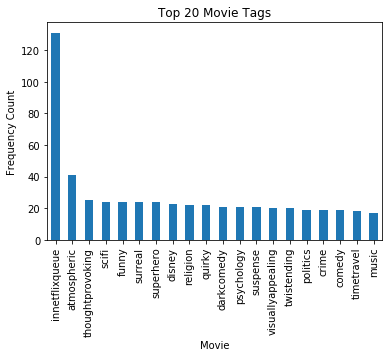

In [9]:

plt.title('Top 20 Movie Tags')
plt.xlabel('Movie')
plt.ylabel('Frequency Count')
updated_tag_df ['tag'].value_counts()[:20].plot(kind='bar')
plt.show()


# Conclusion

**Story telling and the Data visualization** are the main and vital components that can be considered as the main objective of any data science based explorative analysis. In this project, I learnt about few ways to yield compelling visualizations that can be helpful in telling interesting and valuable story about the data. First e cleaned the datasets, followed by merging them into a single common dataframe. Then, using individual dataframes (Movies, Ratings, Tags) as well as combined.merged dataframe, we obtained several compelling visuaizations to tell story about the given datasets.


# References

1) https://github.com/usajid/731_assign3